In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pmdarima
from pmdarima.arima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [3]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [6]:
ls'/content/drive/MyDrive/Capstone'

ls: cannot access '/content/drive/MyDrive/Capstone': No such file or directory


In [8]:
df = pd.read_csv('/content/drive/MyDrive/State_Surplus_Detail.csv')
df.head()

,year,state,sector,sub_sector,sub_sector_category,food_type,food_category,tons_surplus,tons_supply,us_dollars_surplus,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,2021,Alabama,Farm,Not Applicable,Not Applicable,Dry Goods,Nuts And Seeds,8314.881697,320214.88170,3883810.342,...,0.000000,0.0,0.000000,0.0,0.000000,34693.574640,2.560352,34696.134990,4.676082e+09,1.385814e+07
1,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,Blueberries,139.167450,388.26000,494817.600,...,0.020849,0.0,0.558300,0.0,5.315771,28.445657,4.401602,32.847259,4.530973e+06,2.301499e+05
2,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,Cucumbers,8246.744228,39221.74423,4094485.213,...,0.000000,0.0,0.000000,0.0,0.000000,1692.175305,358.479322,2050.654627,2.695385e+08,1.374457e+07
3,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,Peaches,778.298537,2048.10540,2140320.976,...,0.229554,0.0,6.146940,0.0,58.527178,158.484371,15.688522,174.172893,2.524422e+07,1.277392e+06
4,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,Potatoes,7515.581310,34139.65754,3216668.801,...,3.781502,0.0,101.260224,0.0,155.507321,1529.873025,286.813914,1816.686938,2.436862e+08,1.232660e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516692 entries, 0 to 516691
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         516692 non-null  int64  
 1   state                        516692 non-null  object 
 2   sector                       516692 non-null  object 
 3   sub_sector                   516692 non-null  object 
 4   sub_sector_category          516692 non-null  object 
 5   food_type                    516692 non-null  object 
 6   food_category                516692 non-null  object 
 7   tons_surplus                 516692 non-null  float64
 8   tons_supply                  516692 non-null  float64
 9   us_dollars_surplus           516692 non-null  float64
 10  tons_waste                   516692 non-null  float64
 11  tons_uneaten                 516692 non-null  float64
 12  tons_eaten                   516692 non-null  float64
 13 

In [10]:
df_num = df.select_dtypes(include=['number'])
df_num

,year,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_uneaten,tons_eaten,tons_donated,tons_biomaterial_processing,tons_animal_feed,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,2021,8314.881697,320214.881700,3.883810e+06,8314.881697,8314.881697,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,34693.574640,2.560352,34696.134990,4.676082e+09,1.385814e+07
1,2021,139.167450,388.260000,4.948176e+05,124.154921,138.089945,1.077505,1.077505,0.0,13.935025,...,0.020849,0.000000,0.558300,0.0,5.315771,28.445657,4.401602,32.847259,4.530973e+06,2.301499e+05
2,2021,8246.744228,39221.744230,4.094485e+06,8246.744228,8246.744228,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1692.175305,358.479322,2050.654627,2.695385e+08,1.374457e+07
3,2021,778.298537,2048.105400,2.140321e+06,613.009072,766.435101,11.863436,11.863436,0.0,153.426029,...,0.229554,0.000000,6.146940,0.0,58.527178,158.484371,15.688522,174.172893,2.524422e+07,1.277392e+06
4,2021,7515.581310,34139.657540,3.216669e+06,6900.206587,7395.960457,119.620853,119.620853,0.0,495.753871,...,3.781502,0.000000,101.260224,0.0,155.507321,1529.873025,286.813914,1816.686938,2.436862e+08,1.232660e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516687,2010,309.084712,15004.112250,4.096285e+05,232.245118,232.245118,76.839594,76.839594,0.0,0.000000,...,0.000000,4.699248,136.057990,0.0,0.000000,786.289357,29.605148,815.894505,4.482731e+06,3.870752e+05
516688,2010,6.558503,318.373945,2.665989e+04,4.928035,4.928035,1.630468,1.630468,0.0,0.000000,...,0.000000,0.099714,2.887030,0.0,0.000000,16.684362,0.628195,17.312557,9.511957e+04,8.213392e+03
516689,2010,10.763136,522.482309,5.080223e+04,8.087381,8.087381,2.675755,2.675755,0.0,0.000000,...,0.000000,0.163640,4.737894,0.0,0.000000,27.380646,1.030928,28.411574,1.561004e+05,1.347897e+04
516690,2010,16.211106,786.946897,1.764552e+04,12.180966,12.180966,4.030140,4.030140,0.0,0.000000,...,0.000000,0.246470,7.136071,0.0,0.000000,41.239892,1.552753,42.792645,2.351136e+05,2.030161e+04


In [11]:
arima_data = df_num[['year' ,'tons_waste']]

# Ensure 'year' column is in datetime format
# arima_data['year'] = pd.to_datetime(arima_data['year'])

# Set 'year' column as index
arima_data.set_index('year', inplace=True)
arima_data

,tons_waste
year,
2021,8314.881697
2021,124.154921
2021,8246.744228
2021,613.009072
2021,6900.206587
...,...
2010,232.245118
2010,4.928035
2010,8.087381


In [12]:
df_avg_yearly = arima_data.groupby('year')['tons_waste'].mean().reset_index()
df_avg_yearly['year'] = pd.to_datetime(df_avg_yearly['year'], format='%Y')
df_avg_yearly.set_index('year', inplace=True)
df_avg_yearly

,tons_waste
year,
2010-01-01,1576.975346
2011-01-01,1623.243398
2012-01-01,1646.404345
2013-01-01,1688.248891
2014-01-01,1731.063223
2015-01-01,1726.463183
2016-01-01,1778.078557
2017-01-01,1772.263073
2018-01-01,1838.842757


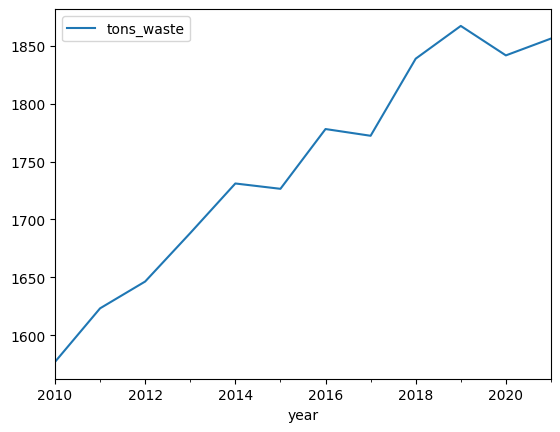

In [13]:
df_avg_yearly.plot()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_avg_yearly['tons_waste'])
result

(-3.66858195707283,
 0.004577419055519521,
 4,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 56.065450730258675)

In [15]:
# df_avg_yearly['year'] = pd.to_datetime(df_avg_yearly['year'], format='%Y')

In [16]:
# df_avg_yearly.info()

In [17]:
# Code to get dynamic last six months data in the test data

# train_data = df_avg_yearly[df_avg_yearly['year'] < 2019]
# test_data = df_avg_yearly[df_avg_yearly['year'] >= 2019]

In [18]:
# Import the ARIMA model
import statsmodels.api as sm

# Instantiate the model
model = sm.tsa.ARIMA(df_avg_yearly, order=(1, 0, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             tons_waste   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -61.340
Date:                Mon, 08 Apr 2024   AIC                            130.681
Time:                        21:24:48   BIC                            132.620
Sample:                    01-01-2010   HQIC                           129.963
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1722.6726    112.844     15.266      0.000    1501.503    1943.842
ar.L1          0.9451      0.186      5.087      0.000       0.581       1.309
ma.L1          0.1464      0.519      0.282      0.7

In [19]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-5)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower tons_waste']
upper_limits = confidence_intervals.loc[:,'upper tons_waste']

# Print best estimate predictions
print(mean_forecast)

2017-01-01    1782.825493
2018-01-01    1767.996260
2019-01-01    1842.840098
2020-01-01    1862.759349
2021-01-01    1832.065322
Freq: AS-JAN, Name: predicted_mean, dtype: float64


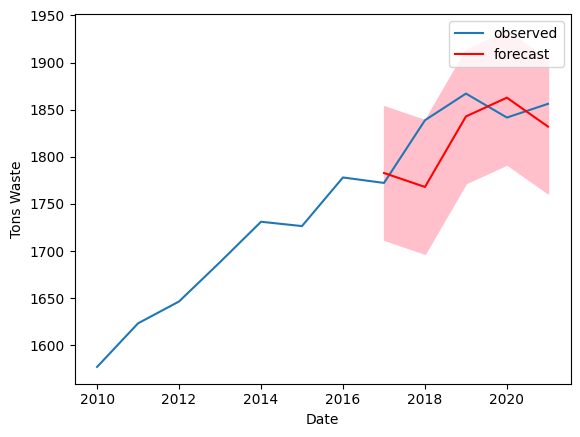

In [20]:
# plot the  data
plt.plot(df_avg_yearly.index, df_avg_yearly, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Tons Waste')
plt.legend()
plt.show()

In [21]:
forecast = results.get_forecast(steps =4)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower tons_waste']
upper_limits = confidence_intervals.loc[:,'upper tons_waste']

# Print best estimate predictions
print(mean_forecast)

2022-01-01    1852.420512
2023-01-01    1845.302223
2024-01-01    1838.574460
2025-01-01    1832.215799
Freq: AS-JAN, Name: predicted_mean, dtype: float64


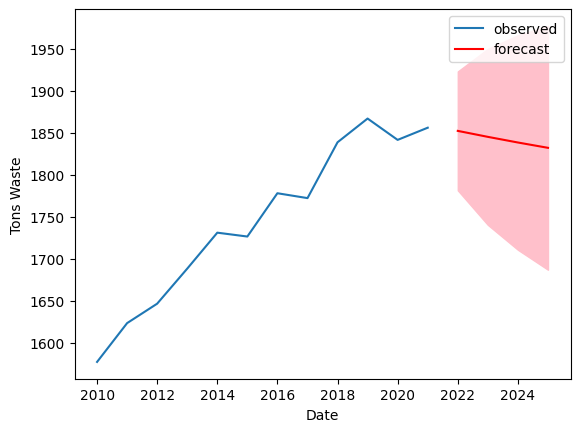

In [22]:
# plot the  data
plt.plot(df_avg_yearly.index, df_avg_yearly, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Tons Waste')
plt.legend()
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

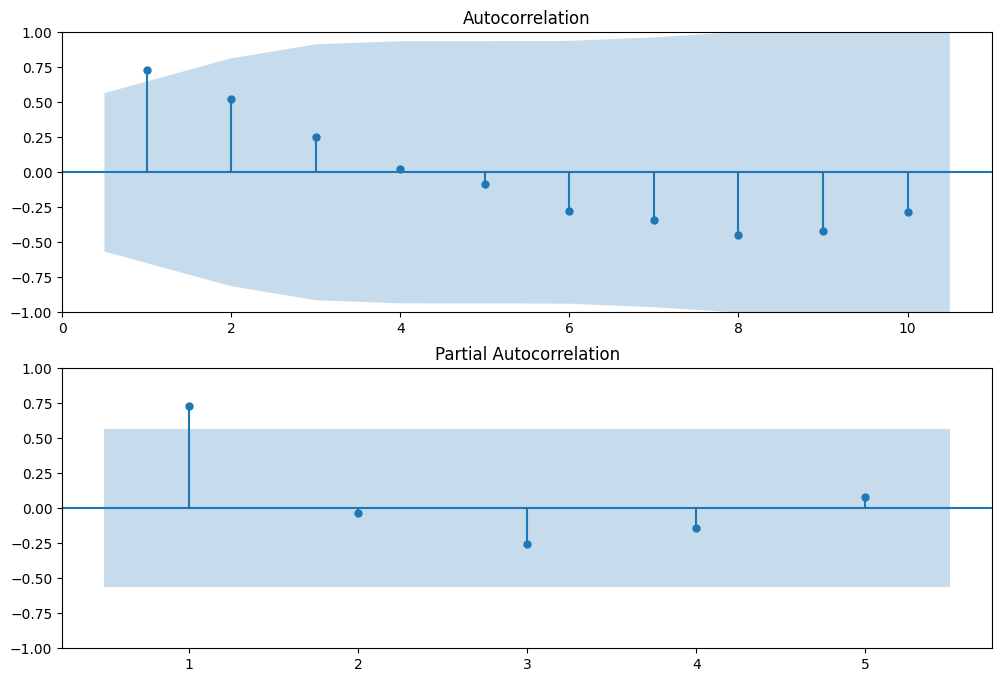

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

plot_acf(df_avg_yearly['tons_waste'], lags=10, zero=False, ax=ax1)

plot_pacf(df_avg_yearly['tons_waste'], lags=5, zero=False, ax=ax2)

plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-3
for p in range(3):
# Loop over q values from 0-3
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = ARIMA(df_avg_yearly['tons_waste'], order=(p, 0, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            print(p, q, None, None)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

In [27]:
# Construct DataFrame from order_aic_bic
order_data = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_data.sort_values('AIC'))

   p  q         AIC         BIC
8  2  2  124.887678  127.797118
3  1  0  129.049650  130.504370
5  1  2  129.090242  131.514776
6  2  0  130.319905  132.259531
4  1  1  130.680763  132.620390
7  2  1  132.449136  134.873670
2  0  2  136.153949  138.093576
1  0  1  139.094275  140.548995
0  0  0  146.839175  147.808988


In [28]:
import statsmodels.api as sm

model = sm.tsa.ARIMA(df_avg_yearly['tons_waste'], order=(1, 0, 1))

results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             tons_waste   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -61.340
Date:                Mon, 08 Apr 2024   AIC                            130.681
Time:                        21:25:18   BIC                            132.620
Sample:                    01-01-2010   HQIC                           129.963
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1722.6726    112.844     15.266      0.000    1501.503    1943.842
ar.L1          0.9451      0.186      5.087      0.000       0.581       1.309
ma.L1          0.1464      0.519      0.282      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [29]:
# Make predictions
predictions = results.predict()

# Actual values
actual_values = df_avg_yearly['tons_waste']

# Calculate errors
errors = actual_values - predictions

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(errors))
print("Mean Absolute Error (MAE):", mae)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(errors / actual_values)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(errors**2))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 40.22859454757795
Mean Absolute Percentage Error (MAPE): 2.36232466091595
Root Mean Squared Error (RMSE): 54.16037941944249
